Start by importing packages. source_loc should be the folder where the source files are located. Load data to check that it has the correct size and shape

In [3]:
import sys
import numpy as np
source_loc = "/project/wyin/jlee/ml-project/source"
sys.path.append(source_loc)
from utilities import find_knn, ProblemStatement, UnscaledData, see_results, ScaledData
data_loc, X_name, y_name = ProblemStatement().prob_vars
data = ScaledData(data_loc, X_name, y_name, check_data = True)    #Set check_data to False to suppress output.

Double checking dataset sizes:

Training set x size: (25534, 354). Training set y size: (25534, 3)

validation set x size: (3103, 354). Validation set y size: (3103, 3)

Testing set x size: (3238, 354). Testing set y size: (3238, 3)



Do hyperparameter tuning of knn models here to find the optimal number of neighbors. You can change:
1. The maximum number of neighbors. The find_knn function will iterate through number of neighbors up to max_neighbors. Default is 20
2. The weight function. The default is uniform.
3. Scaling: Whether or not the data is scaled before running the knn algorithm. Default is true

The find_knn function returns the optimal model found

trying n neights = 1
trying n neights = 2
trying n neights = 3
trying n neights = 4
trying n neights = 5
trying n neights = 6
trying n neights = 7
trying n neights = 8
trying n neights = 9
trying n neights = 10
trying n neights = 11
trying n neights = 12
trying n neights = 13
trying n neights = 14
trying n neights = 15
trying n neights = 16
trying n neights = 17
trying n neights = 18
trying n neights = 19
Minimum val loss: 4.070966471825616e-05
Best number of neighbors: 9


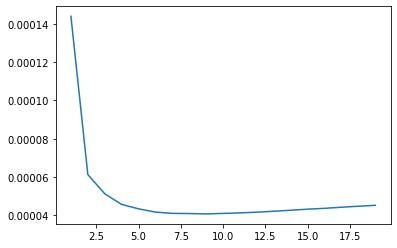

In [4]:
def get_weights(distances):
    return distances ** -3

best_model = find_knn(data_loc, X_name, y_name, max_neighbors = 20, weight_func = get_weights, scaled = False)

Once a good model has been found, apply the model to the test set for the final evluation. 
First, get the predicted values of the test set. If you trained the knn on scaled data, change the first line below to use the UnscaledData class

In [5]:
data = UnscaledData(data_loc, X_name, y_name)      #For knn on scaled data: data = ScaledData(data_loc, X_name, y_name)  
predicted = best_model.predict(data.test_X)

Now, see how well the model performs on the testing set. arguments in see_results:
1. predicted: ML predicted outputs
2. truth: Ground truth outputs
3. grid_shape: Shape of grid of output graphs
4. Percentiles: List of the percentile performances to display; must fewer or equal elements as number of graphs
5. x_vals: The x values of the output graphs, should be a list with as many elements as output dimensions
6. tick_labels: Optional. Labels on x axis of the output graphs, default value is None
7. same_ylim: Optional. Determines whether every graph has the same y axis scale. Default value is True

see_results returns the predicted and ground truth values for every percentile shown in the graphs, in a list of tuples, where each tuple is (mean squared error, predicted, ground truth)

model mse: 4.194476108913502e-05


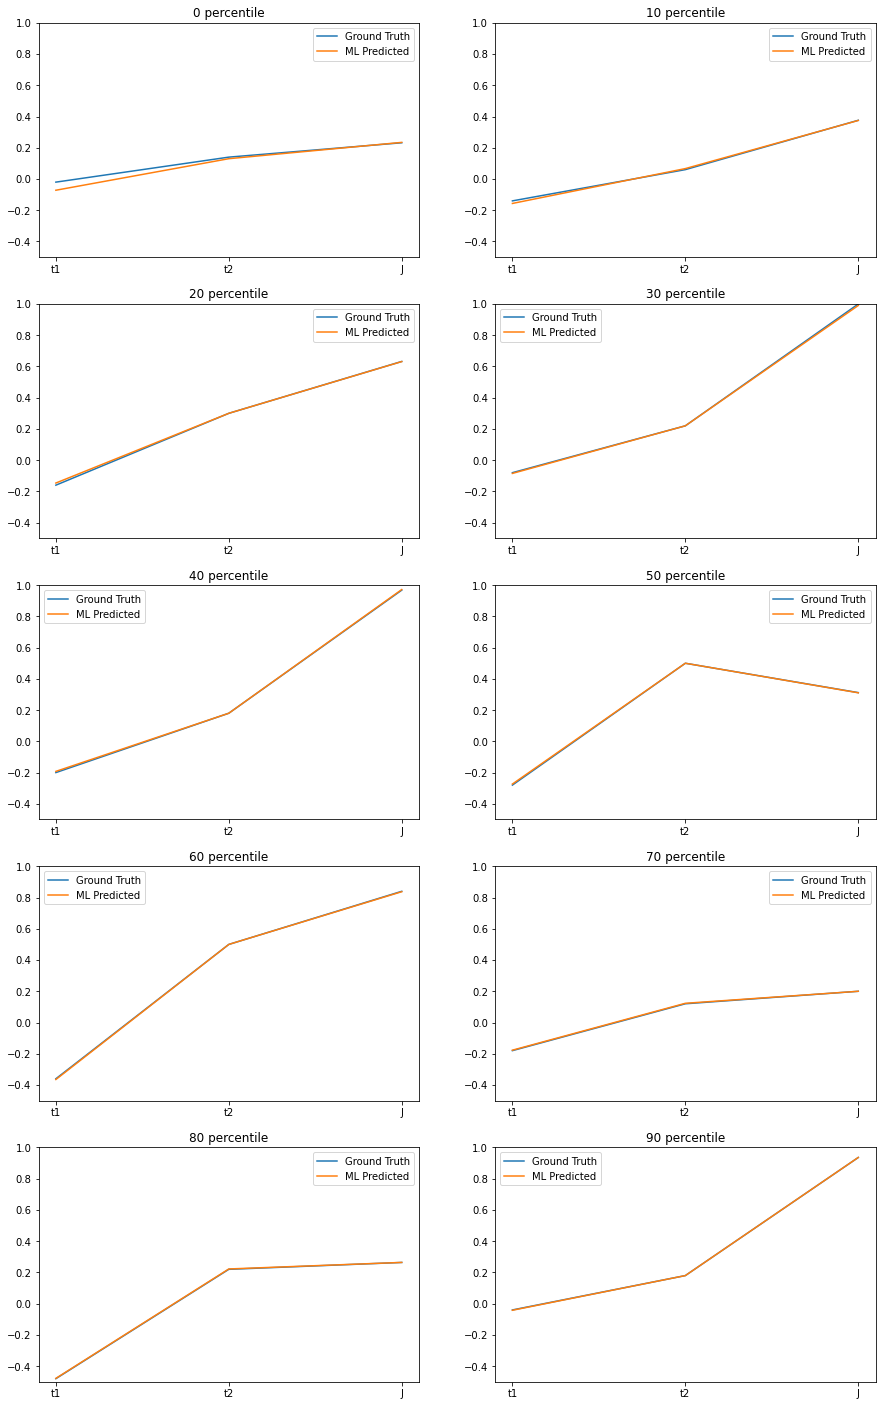

In [6]:
percentiles = see_results(predicted = predicted, 
            truth = data.test_y, 
            grid_shape = (5, 2), 
            percentiles = np.arange(0, 100, 10), 
            x_vals = np.arange(3), 
            tick_labels = ['t1', 't2', 'J'], 
            same_ylim = True)

We can also use the returned percentiles to get the same information above in printed values

In [7]:
for i, (mse, predicted, truth) in enumerate(percentiles):
    print(f"Percentile {10 * i}")
    print(f"ground truth: t': {truth[0]}, t'': {truth[1]}, J: {truth[2]}")
    print(f"predicted: t': {predicted[0]:.4f}, t'': {predicted[1]:.4f}, J: {predicted[2]:.4f} ")
    print()

Percentile 0
ground truth: t': -0.02, t'': 0.14, J: 0.232
predicted: t': -0.0718, t'': 0.1300, J: 0.2345 

Percentile 10
ground truth: t': -0.14, t'': 0.06, J: 0.376
predicted: t': -0.1565, t'': 0.0667, J: 0.3748 

Percentile 20
ground truth: t': -0.16, t'': 0.3, J: 0.632
predicted: t': -0.1463, t'': 0.3000, J: 0.6311 

Percentile 30
ground truth: t': -0.08, t'': 0.22, J: 1.0
predicted: t': -0.0847, t'': 0.2200, J: 0.9903 

Percentile 40
ground truth: t': -0.2, t'': 0.18, J: 0.968
predicted: t': -0.1922, t'': 0.1800, J: 0.9718 

Percentile 50
ground truth: t': -0.28, t'': 0.5, J: 0.312
predicted: t': -0.2732, t'': 0.5000, J: 0.3108 

Percentile 60
ground truth: t': -0.36, t'': 0.5, J: 0.84
predicted: t': -0.3648, t'': 0.5000, J: 0.8374 

Percentile 70
ground truth: t': -0.18, t'': 0.12, J: 0.2
predicted: t': -0.1771, t'': 0.1231, J: 0.2000 

Percentile 80
ground truth: t': -0.48, t'': 0.22, J: 0.264
predicted: t': -0.4780, t'': 0.2224, J: 0.2643 

Percentile 90
ground truth: t': -0.04,